## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32, 16]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer{}".format(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer{}".format(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=m)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "m-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.700000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)  

Epoch 46/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.8949 - accuracy: 0.6860 - val_loss: 1.6976 - val_accuracy: 0.4781
Epoch 47/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8907 - accuracy: 0.6853 - val_loss: 1.7384 - val_accuracy: 0.4755
Epoch 48/50
50000/50000 [==============================] - 9s 182us/step - loss: 0.8757 - accuracy: 0.6907 - val_loss: 1.5796 - val_accuracy: 0.4993
Epoch 49/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.8470 - accuracy: 0.7015 - val_loss: 1.6648 - val_accuracy: 0.4844
Epoch 50/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8410 - accuracy: 0.7028 - val_loss: 1.6023 - val_accuracy: 0.4997
Experiment with MOMENTUM = 0.900000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

Epoch 41/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.3034 - accuracy: 0.1019 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.3034 - accuracy: 0.0996 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.3035 - accuracy: 0.0991 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 9s 170us/step - loss: 2.3034 - accuracy: 0.0995 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3035 - accuracy: 0.0962 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.3035 - accuracy: 0.1007 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.3035 - accuracy: 0.09

50000/50000 [==============================] - 11s 222us/step - loss: 2.3044 - accuracy: 0.0951 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.3045 - accuracy: 0.1001 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.3043 - accuracy: 0.0992 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 10s 206us/step - loss: 2.3041 - accuracy: 0.1009 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.3041 - accuracy: 0.0996 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.3042 - accuracy: 0.0985 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.3047 - accuracy: 0.0990 - va

Epoch 30/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.3064 - accuracy: 0.1007 - val_loss: 2.3063 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.3077 - accuracy: 0.1024 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 10s 196us/step - loss: 2.3061 - accuracy: 0.1016 - val_loss: 2.3097 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.3066 - accuracy: 0.0999 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.3066 - accuracy: 0.0979 - val_loss: 2.3094 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3075 - accuracy: 0.0983 - val_loss: 2.3061 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3092 - accuracy: 

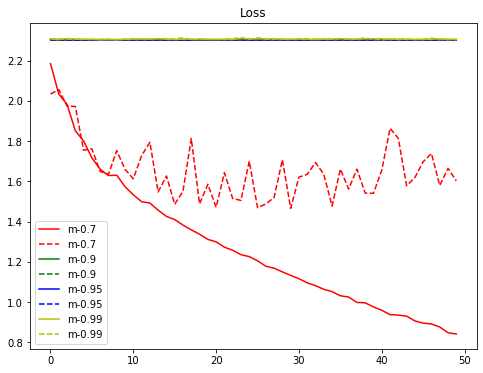

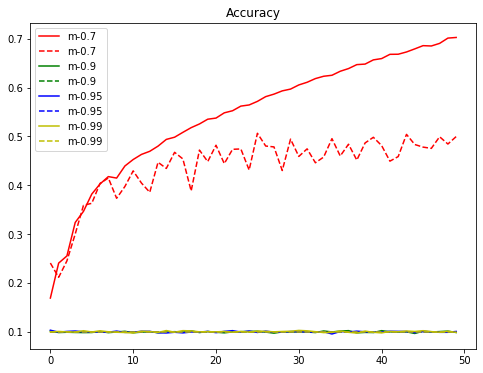

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()